In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import warnings
from datetime import datetime
from matplotlib import gridspec
warnings.filterwarnings('ignore')
%matplotlib inline

In [13]:
#filenames
FILE_SOIL = 'k34_SPCD30_2012_2017_v2.csv'
FILE_MET = 'k34_Met_2012_2017_v5.csv'
FILE_SOIL_R = 'SWC_R_Corrected.pkl'

In [15]:
# read data
df_soil = pd.read_csv(FILE_SOIL,header = 0, na_values='-9999')
df_met = pd.read_csv(FILE_MET, header = 0, na_values = '-9999')
df_soil_r = pd.read_pickle(FILE_SOIL_R)

In [32]:
time_met = [datetime.strptime(str(i),'%Y%m%d%H%M') for i in df_met['TIMESTAMP_START']]
time_soil = [datetime.strptime(str(i),'%Y%m%d%H%M') for i in df_soil['TIMESTAMP_START']]
time_soil_r = df_soil_r['TIMESTAMP']

In [18]:
# Depths and heights
depth_soil = [-5,-10,-20,-30,-40,-100]
depth_met = [-2,-5,-10,-20,-50]
depth_soil_r = [-10, -20, -40, -60, -100]

In [19]:
height_tem = [51.1,42.5,35.5,28.0,15.6,5.2]
height_co2 = [50,35.3,28,15.6,5.2,0.5] # H2O and CO2 at the same heights

In [20]:
# profiles
Ta_prof = np.vstack((df_met['TA_1'],df_met['TA_2'],df_met['TA_3'],df_met['TA_4'],df_met['TA_5'],df_met['TA_6']))
co2_prof = np.vstack((df_met['CO2_1'],df_met['CO2_2'],df_met['CO2_3'],df_met['CO2_4'],df_met['CO2_5'],df_met['CO2_6']))
h2o_prof = np.vstack((df_met['H2O_1'],df_met['H2O_2'],df_met['H2O_3'],df_met['H2O_4'],df_met['H2O_5'],df_met['H2O_6']))

swc_k34 = np.vstack((df_soil['SWC_1'],df_soil['SWC_2'],df_soil['SWC_3'],
             df_soil['SWC_4'],df_soil['SWC_5'],df_soil['SWC_6']))

Ts_prof = np.vstack((df_soil['TS_1'],df_soil['TS_2'],df_soil['TS_3'],
             df_soil['TS_4'],df_soil['TS_5']))

swc_p1 = np.vstack((df_soil_r['VWC_1_Avg'],df_soil_r['VWC_2_Avg'],df_soil_r['VWC_3_Avg'],
df_soil_r['VWC_4_Avg'],df_soil_r['VWC_5_Avg']))

swc_p2 = np.vstack((df_soil_r['VWC_6_Avg'],df_soil_r['VWC_7_Avg'],df_soil_r['VWC_8_Avg'],
df_soil_r['VWC_9_Avg'],df_soil_r['VWC_10_Avg']))

Ts_p1 = np.vstack((df_soil_r['T_1_Avg'],df_soil_r['T_2_Avg'],df_soil_r['T_3_Avg'],
df_soil_r['T_4_Avg'],df_soil_r['T_5_Avg']))

Ts_p2 = np.vstack((df_soil_r['T_6_Avg'],df_soil_r['T_7_Avg'],df_soil_r['T_8_Avg'],
df_soil_r['T_9_Avg'],df_soil_r['T_10_Avg']))

Text(0, 0.5, 'Pit2 SWC (m^3 m^{-3})')

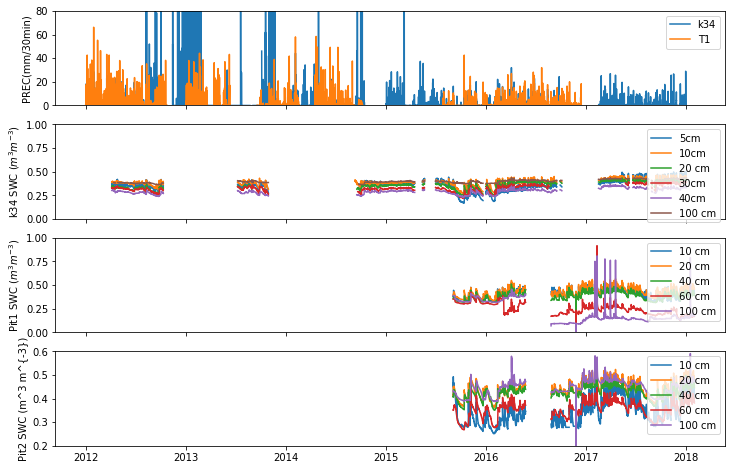

In [34]:
# plot figures for all periods
# plot soil moisture
fig1, axes = plt.subplots(figsize=[12,8],nrows=4,sharex = True)
ax = list(axes.ravel())

idx = 0
ax[idx].plot(time_met,df_met['P_1'],time_met,df_met['P_2'])
ax[idx].set_ylim(0,80)
ax[idx].legend(('k34','T1'),loc = 'upper right')
ax[idx].set_ylabel('PREC(mm/30min)')

idx = 1
ax[idx].plot(time_soil,df_soil['SWC_1'],
             time_soil,df_soil['SWC_2'],
             time_soil,df_soil['SWC_3'],
             time_soil,df_soil['SWC_4'],
             time_soil,df_soil['SWC_5'],
             time_soil,df_soil['SWC_6'])
ax[idx].set_ylim(0,1)
ax[idx].legend(('5cm','10cm', '20 cm','30cm','40cm','100 cm'),loc = 'upper right')
ax[idx].set_ylabel('k34 SWC ($m^3 m^{-3}$)')

idx = 2
ax[idx].plot(time_soil_r,df_soil_r['VWC_1_Avg'],
             time_soil_r,df_soil_r['VWC_2_Avg'],
             time_soil_r,df_soil_r['VWC_3_Avg'],
             time_soil_r,df_soil_r['VWC_4_Avg'],
             time_soil_r,df_soil_r['VWC_5_Avg'])
ax[idx].set_ylim(0,1)
ax[idx].legend(('10 cm','20 cm', '40 cm','60 cm','100 cm'),loc = 'upper right')
ax[idx].set_ylabel('Pit1 SWC ($m^3 m^{-3}$)')

idx = 3
ax[idx].plot(time_soil_r,df_soil_r['VWC_6_Avg'],
             time_soil_r,df_soil_r['VWC_7_Avg'],
             time_soil_r,df_soil_r['VWC_8_Avg'],
             time_soil_r,df_soil_r['VWC_9_Avg'],
             time_soil_r,df_soil_r['VWC_10_Avg'])
ax[idx].set_ylim(0.2,0.6)
ax[idx].legend(('10 cm','20 cm', '40 cm','60 cm','100 cm'),loc = 'upper right')
ax[idx].set_ylabel('Pit2 SWC ($m^3 m^{-3}$)')

Text(0, 0.5, 'Pit2 Ts ($C^o$)')

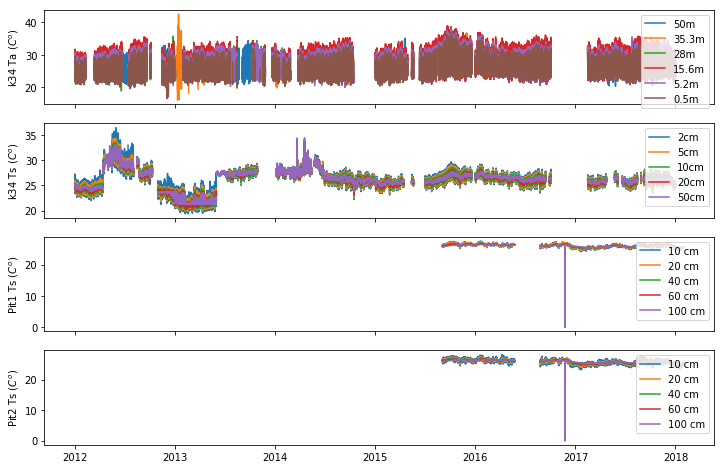

In [36]:
# Plot temperature
fig2, axes = plt.subplots(figsize=[12,8],nrows=4,sharex = True)
ax = list(axes.ravel())

idx = 0
ax[idx].plot(time_met,df_met['TA_1'],
             time_met,df_met['TA_2'],
             time_met,df_met['TA_3'],
             time_met,df_met['TA_4'],
             time_met,df_met['TA_5'],
             time_met,df_met['TA_6'])
# ax[idx].set_ylim(0,1)
ax[idx].legend(('50m','35.3m', '28m','15.6m','5.2m','0.5m'),loc = 'upper right')
ax[idx].set_ylabel('k34 Ta ($^oC$)')

idx = 1
ax[idx].plot(time_soil,df_soil['TS_1'],
             time_soil,df_soil['TS_2'],
             time_soil,df_soil['TS_3'],
             time_soil,df_soil['TS_4'],
             time_soil,df_soil['TS_5'])
# ax[idx].set_ylim(0,1)
ax[idx].legend(('2cm','5cm', '10cm','20cm','50cm'),loc = 'upper right')
ax[idx].set_ylabel('k34 Ts ($^oC$)')

idx = 2
ax[idx].plot(time_soil_r,df_soil_r['T_1_Avg'],
             time_soil_r,df_soil_r['T_2_Avg'],
             time_soil_r,df_soil_r['T_3_Avg'],
             time_soil_r,df_soil_r['T_4_Avg'],
             time_soil_r,df_soil_r['T_5_Avg'])
# ax[idx].set_ylim(0,1)
ax[idx].legend(('10 cm','20 cm', '40 cm','60 cm','100 cm'),loc = 'upper right')
ax[idx].set_ylabel('Pit1 Ts ($^oC$)')

idx = 3
ax[idx].plot(time_soil_r,df_soil_r['T_6_Avg'],
             time_soil_r,df_soil_r['T_7_Avg'],
             time_soil_r,df_soil_r['T_8_Avg'],
             time_soil_r,df_soil_r['T_9_Avg'],
             time_soil_r,df_soil_r['T_10_Avg'])
# ax[idx].set_ylim(0.2,0.6)
ax[idx].legend(('10 cm','20 cm', '40 cm','60 cm','100 cm'),loc = 'upper right')
ax[idx].set_ylabel('Pit2 Ts ($^oC$)')